In [1]:
import pandas as pd
import seaborn as sns
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')
true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31/12/17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29/12/17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31/12/17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30/12/17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29/12/17


In [2]:
fake.tail()

,title,text,subject,date
23445,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16/1/16
23446,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16/1/16
23447,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15/1/16
23448,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14/1/16
23449,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,12/1/16


In [3]:
true.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [4]:
fake.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [5]:
true['label'] = 1
fake['label'] = 0
frames = [true.loc[:][:], fake.loc[:][:]] #Slicing untuk semua isi dataset fake dan true
df = pd.concat(frames) # Menggabungkan dataset jadi 1
df.tail()

,title,text,subject,date,label
23445,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16/1/16,0
23446,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16/1/16,0
23447,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15/1/16,0
23448,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14/1/16,0
23449,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,12/1/16,0


In [6]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31/12/17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29/12/17,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31/12/17,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30/12/17,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29/12/17,1


<Axes: xlabel='label', ylabel='count'>

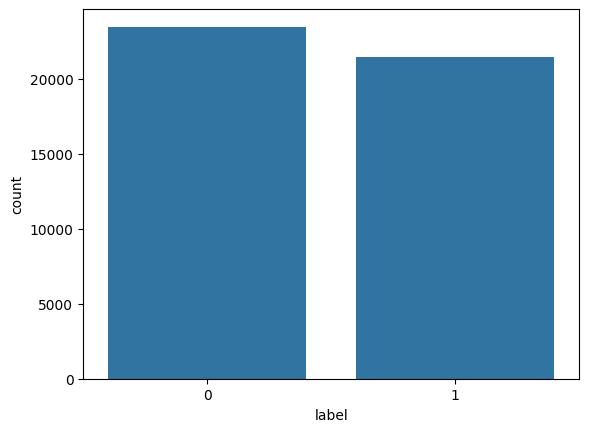

In [7]:
sns.countplot(data = df, x = 'label')

/tmp/ipython-input-8-3831612664.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors = 'coerce') #Mengubah format kolom date menjadi datetime


<Axes: xlabel='Year', ylabel='count'>

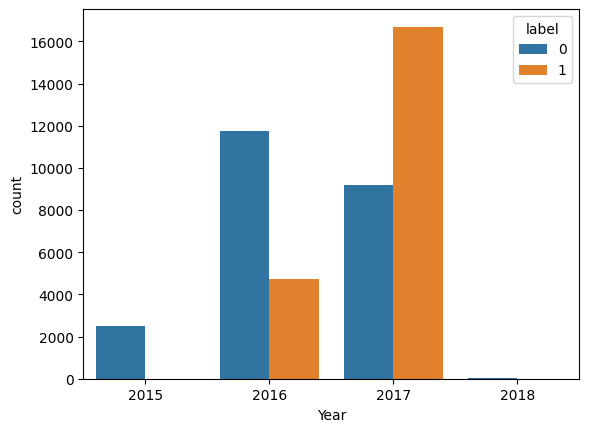

In [8]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce') #Mengubah format kolom date menjadi datetime
df['Year'] = df['date'].dt.year #Membuat kolom baru ‘Year’
df['Month'] = df['date'].dt.month #Membuat kolom baru ‘Month’
sns.countplot(data = df, x = "Year", hue = "label")

In [9]:
df.subject.value_counts()

,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6833
left-news,4454
Government News,1568
US_News,775
Middle-east,770


<Axes: xlabel='Year', ylabel='count'>

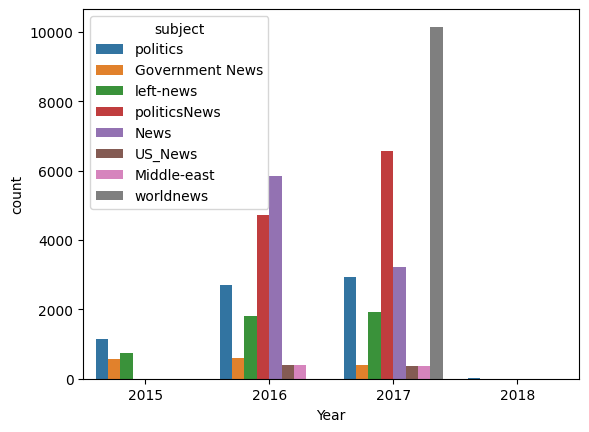

In [10]:
sns.countplot(data = df, x = "Year", hue="subject")

In [11]:
frames = [true.head(200), fake.head(200)] #Mengambil 200 baris data pertama dari masing-masing dataframe true dan fake
df = pd.concat(frames) #gabungkan ke-2 dataframes yang sudah di-slices
X = df.drop('label', axis = 1)
y = df['label']

In [12]:
X.tail()

,title,text,subject,date
195,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,23/10/17
196,Trump SCREAMS On Twitter After Seeing A Poll ...,Rex Tillerson was right. Donald Trump is a f*c...,News,22/10/17
197,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,21/10/17
198,NRA Releases Fascist Ad Calling All Trump Cri...,The First Amendment of the United States Const...,News,21/10/17
199,"Trump Takes Credit For Releasing JFK Files, B...","Saturday morning, Trump was going through his ...",News,21/10/17


In [13]:
y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [14]:
df = df.dropna() #Menghapus missing value (apabila ada)
df2 = df.copy()
df2.reset_index(inplace = True)
df2.tail()

,index,title,text,subject,date,label
395,195,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,23/10/17,0
396,196,Trump SCREAMS On Twitter After Seeing A Poll ...,Rex Tillerson was right. Donald Trump is a f*c...,News,22/10/17,0
397,197,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,21/10/17,0
398,198,NRA Releases Fascist Ad Calling All Trump Cri...,The First Amendment of the United States Const...,News,21/10/17,0
399,199,"Trump Takes Credit For Releasing JFK Files, B...","Saturday morning, Trump was going through his ...",News,21/10/17,0


In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

nltk.download('stopwords')
ps = PorterStemmer()
corpus = [] #inisialisasi list kosong untuk menyimpan data setelah text diproses
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word
	in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
print(corpus)

['washington reuter head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas non defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas non defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said meadow among republican vote late decemb parti 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer()
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']
X #List yang menyimpan data hasil vectorization

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('accuracy:   %0.3f' % score)

accuracy:   0.950


Text(0.5, 1.0, 'Confusion Matrix')

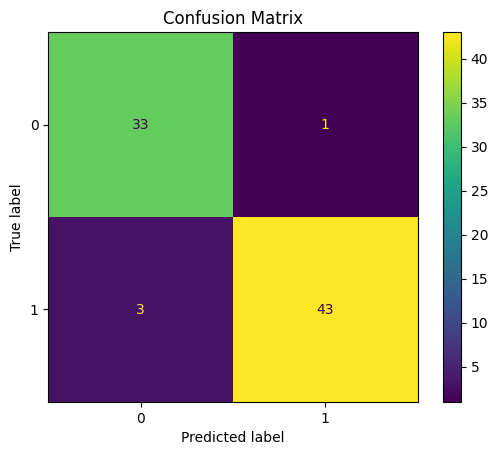

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(classifier,
X_test, y_test)
disp.ax_.set_title("Confusion Matrix")

In [21]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [22]:
model = pickle.load(open('model2.pkl', 'rb'))
tfidfvect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [23]:
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidfvect.transform([review]).toarray()
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction

In [36]:
texts = [
    "Former CIA Openly Suggests He’s Like A Dictator",
    "Lindsey Graham Trashes Media For Portraying Trump As Kooky",
    "Hillary Clinton, Tax Cut Bill",
    "Trump Says He's Done More Than Any President Ever"
]
predictions = [predict(text) for text in texts]
print(predictions)


['FAKE', 'FAKE', 'REAL', 'FAKE']
